In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
class LogisticRegressionModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        self.L1 = tf.keras.layers.Dense(units=1, activation='sigmoid')
    
    def call(self, inputs):
        self.x = self.L1(inputs)
        return self.x

In [4]:
data = pd.read_csv('dataset/logistic_regression.txt').to_numpy()

In [5]:
x = data[:, 0:2].reshape(data.shape[0], 2)
y = data[:, 2].reshape(data.shape[0], 1)

print('X Shape:', x.shape)
print('Y Shape:', y.shape)

X Shape: (117, 2)
Y Shape: (117, 1)


In [6]:
model = LogisticRegressionModel()

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
hist = model.fit(x=x, y=y, epochs=800, verbose=0)

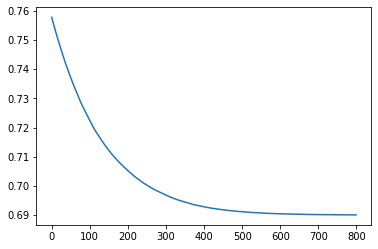

In [9]:
plt.plot(hist.history['loss'])
plt.show()

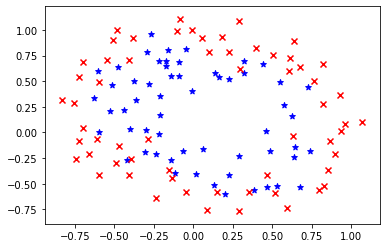

In [10]:
positives = (y == 1).reshape(x.shape[0])
negatives = (y == 0).reshape(x.shape[0])

x_p_positives = x[positives, :]
x_p_negatives = x[negatives, :]

plt.scatter(x_p_positives[:, 0], x_p_positives[:, 1], marker='*', c='b')
plt.scatter(x_p_negatives[:, 0], x_p_negatives[:, 1], marker='x', c='r')
plt.show()

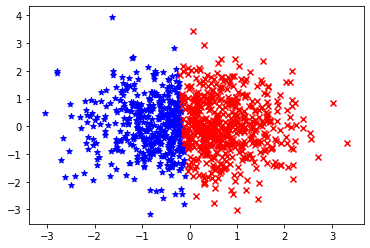

In [11]:
x_test = np.random.randn(1000, 2)
y_test = 1 *(model.predict(x_test) > 0.5)

pos = (y_test == 1).reshape(x_test.shape[0])
neg = (y_test == 0).reshape(x_test.shape[0])

x_test_pos = x_test[pos, :]
x_test_neg = x_test[neg, :]

plt.scatter(x_test_pos[:, 0], x_test_pos[:, 1], marker='*', c='b')
plt.scatter(x_test_neg[:, 0], x_test_neg[:, 1], marker='x', c='r')
plt.show()